# **Projeto Petrobrás**

## Desafio

Desenvolver uma aplicação que seja capaz de
realizar a classificação do ciclo, como sendo:
“normal”, “alerta” ou “anômalo”. Utilizando
como entradas os features “campanha” e/ou
“resistência”.

*   Com os dados de teste, ap.: matriz de confusão,
acurácia, score F1;
*   Com os dados de treinamento, ap.: plotar a
curva de aprendizado


## **PRÉ-PROCESSAMENTO DOS DADOS**


descrição do dataset:
         Unnamed: 0    campaign_E  resistance_E       cycle_E
count  17268.000000  17268.000000  17268.000000  17268.000000
mean   23111.483264   3344.230495      0.012665     26.856382
std    13372.423051   3252.839529      0.008188     22.383915
min        0.000000      4.544912      0.001649      0.000000
25%    13618.750000    948.270051      0.006139     12.000000
50%    25842.500000   2461.632067      0.008878     15.000000
75%    36547.250000   4528.089014      0.018012     39.000000
max    41017.000000  16741.986596      0.057695     84.000000

Número de valores nulos:
Unnamed: 0      0
campaign_E      0
resistance_E    0
cycle_E         0
target_cycle    0
dtype: int64


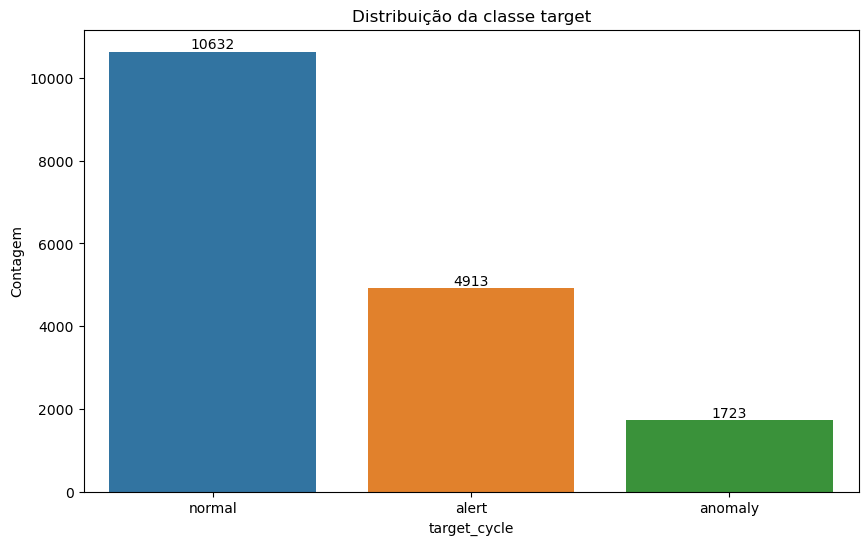

In [7]:
from sklearn.cluster import SpectralClustering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, ConfusionMatrixDisplay, classification_report, silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Carregar o dataset
dataset_path = './dataset/dataset_carbon_filter.csv'
df = pd.read_csv(dataset_path)

# Informações sobre o dataset
print(f'\ndescrição do dataset:\n{df.describe()}')
print(f'\nNúmero de valores nulos:\n{df.isnull().sum()}')

# Verificar a distribuição da classe target
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='target_cycle', data=df)

# Adicionar os valores dentro das barras
ax.bar_label(ax.containers[0])

plt.title('Distribuição da classe target')
plt.xlabel('target_cycle')
plt.ylabel('Contagem')
plt.show()

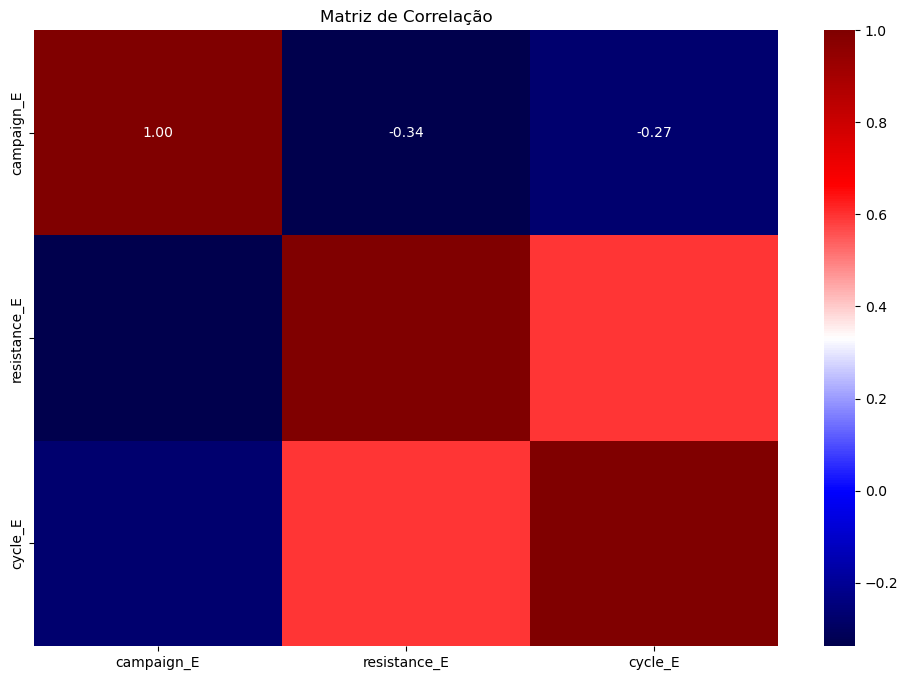

In [3]:
data = df.copy()
data = data.drop(columns=['Unnamed: 0'])
numeric_df = data.select_dtypes(include=[np.number])

# Calcular a matriz de correlação
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='seismic', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

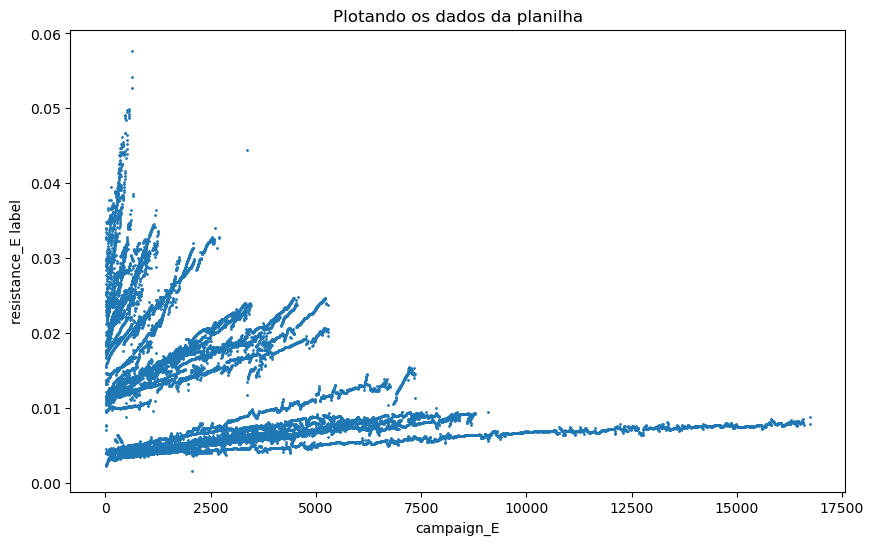

In [4]:
x = df['campaign_E'] 
y = df['resistance_E']  

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=1)
plt.xlabel('campaign_E')  
plt.ylabel('resistance_E label')  
plt.title('Plotando os dados da planilha')
plt.show()

Silhouette Score: 0.63
Valores únicos em y_true: [0 1 2]
Valores únicos em y_pred_mapped: [0 1 2]

Matriz de Confusão - Dados de Teste


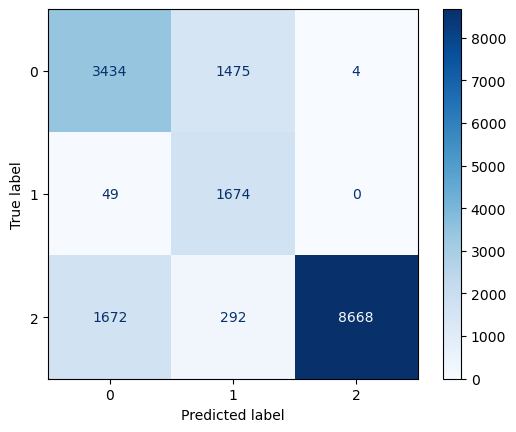

Acurácia: 0.80
Score F1: 0.81

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.67      0.70      0.68      4913
           1       0.49      0.97      0.65      1723
           2       1.00      0.82      0.90     10632

    accuracy                           0.80     17268
   macro avg       0.72      0.83      0.74     17268
weighted avg       0.85      0.80      0.81     17268



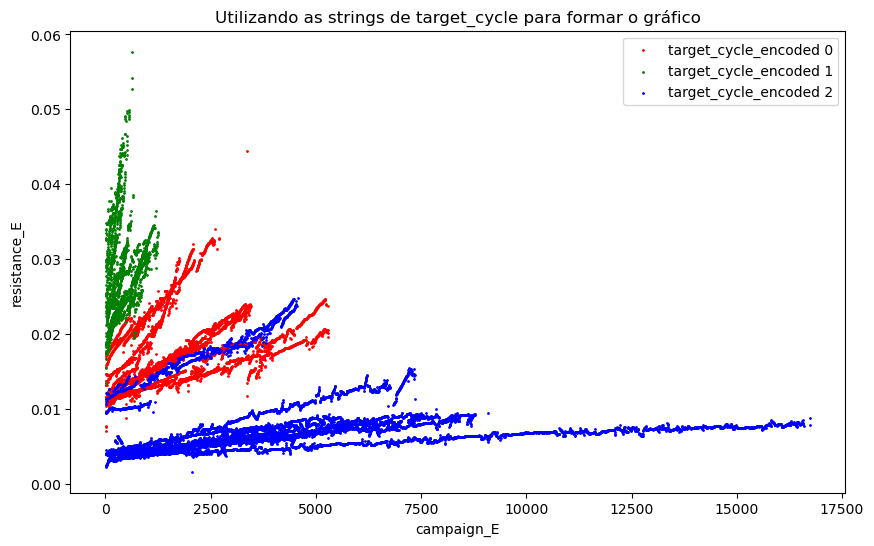

In [10]:
# Seleção das colunas para clustering
X = df[['resistance_E']]

# Aplicação do Spectral Clustering
sc = SpectralClustering(n_clusters=3, assign_labels='kmeans', random_state=42)
df['cluster'] = sc.fit_predict(X)

# Codificar os rótulos target
label_encoder = LabelEncoder()
df['target_cycle_encoded'] = label_encoder.fit_transform(df['target_cycle'])

# Avaliação do clustering usando o Silhouette Score
silhouette_avg = silhouette_score(X, df['cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Mapeamento dos clusters para os rótulos verdadeiros
def map_clusters_to_labels(y_true, y_pred):
    labels = np.zeros_like(y_pred, dtype=int)
    for i in range(3):  # 3 clusters
        mask = (y_pred == i)
        mode_label = pd.Series(y_true[mask]).mode()
        if not mode_label.empty:
            labels[mask] = mode_label[0]
        else:
            labels[mask] = -1  # Se não houver modo, atribua um valor de fallback
    return labels

# Se você tiver rótulos verdadeiros
y_pred_mapped = map_clusters_to_labels(df['target_cycle_encoded'], df['cluster'])

# Verificar os valores únicos para garantir que todos os valores são válidos
print(f'Valores únicos em y_true: {np.unique(df["target_cycle_encoded"])}')
print(f'Valores únicos em y_pred_mapped: {np.unique(y_pred_mapped)}')

# Métricas de avaliação com os dados de teste
print("\nMatriz de Confusão - Dados de Teste")
cm = confusion_matrix(df['target_cycle_encoded'], y_pred_mapped)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Acurácia e F1 Score
print(f'Acurácia: {accuracy_score(df["target_cycle_encoded"], y_pred_mapped):.2f}')
print(f'Score F1: {f1_score(df["target_cycle_encoded"], y_pred_mapped, average="weighted"):.2f}')
print("\nRelatório de Classificação:")
print(classification_report(df['target_cycle_encoded'], y_pred_mapped))

# Plotando os clusters com target_cycle_encoded
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']

for i in range(len(label_encoder.classes_)):
    cluster_data = df[df['target_cycle_encoded'] == i]
    plt.scatter(cluster_data['campaign_E'], cluster_data['resistance_E'], 
                s=1, c=colors[i], label=f'target_cycle_encoded {i}')

plt.title('Utilizando as strings de target_cycle para formar o gráfico')
plt.xlabel('campaign_E')
plt.ylabel('resistance_E')
plt.legend()
plt.show()

    

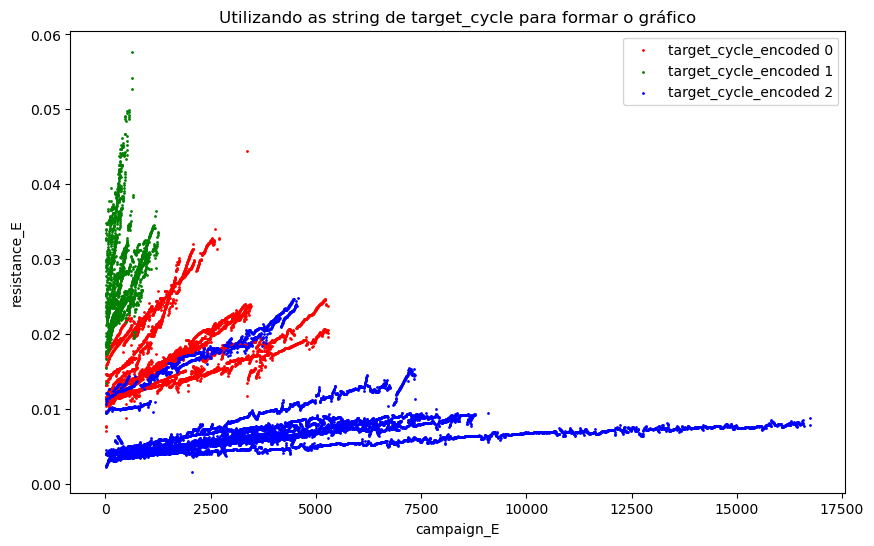

In [12]:
label_encoder = LabelEncoder()
df['target_cycle_encoded'] = label_encoder.fit_transform(df['target_cycle'])
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']

for i in range(3):
    cluster_data = df[df['target_cycle_encoded'] == i]
    plt.scatter(cluster_data['campaign_E'], cluster_data['resistance_E'], 
                s=1, c=colors[i], label=f'target_cycle_encoded {i}')

plt.title('Utilizando as string de target_cycle para formar o gráfico')
plt.xlabel('campaign_E')
plt.ylabel('resistance_E')
plt.legend()
plt.show()